In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./walmart-sales-dataset-of-45stores.csv',parse_dates=['Date'])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [4]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
data.shape

(6435, 8)

In [6]:
data.isnull().mean()*100

Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

In [7]:
data.duplicated().sum()

0

### sorting the dataframe based on the date

In [8]:
data.sort_values(by='Date',inplace=True)
data.reset_index(drop=True,inplace=True)

##### Here, the given temperature value is in farrenheat scale . we have to change this to celsius scale

In [9]:
data['Celsius'] = [(temp - 32)*(5/9) for temp in data.Temperature]

In [10]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Celsius
0,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768,21.722222
1,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067,15.383333
2,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003,30.005556
3,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265,33.027778
4,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476,23.700000


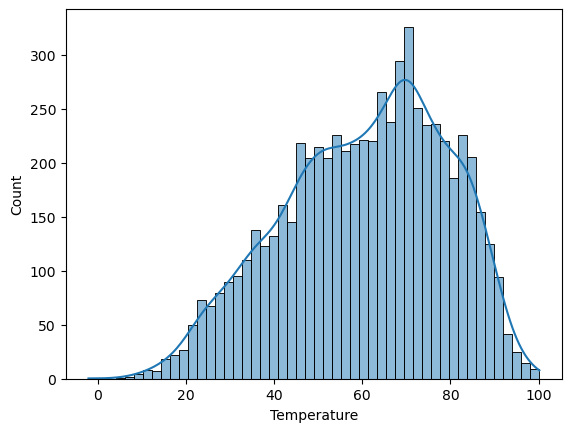

In [11]:
sns.histplot(data=data,kde= True, x = 'Temperature',bins=50)
plt.show()

#### Removing column named Temperature

In [12]:
data.drop(columns=('Temperature'),inplace=True)

#### Finding the maximum ,minimum and mode value to cut the df into 2 parts

In [13]:
data.Celsius.max()

37.855555555555554

In [14]:
data.Celsius.min()

-18.922222222222224

In [15]:
data.Celsius.mean()

15.924323577656914

In [16]:
data['Heat_level'] = pd.cut(x=data.Celsius,bins=[-20,16,40],labels=['Cold','Warm'])
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI,Unemployment,Celsius,Heat_level
0,5,2010-01-10,283178.12,0,2.603,212.226946,6.768,21.722222,Warm
1,15,2010-01-10,566945.95,0,2.840,132.756800,8.067,15.383333,Cold
2,42,2010-01-10,481523.93,0,3.001,126.234600,9.003,30.005556,Warm
3,33,2010-01-10,224294.39,0,3.001,126.234600,9.265,33.027778,Warm
4,36,2010-01-10,422169.47,0,2.567,210.440443,8.476,23.700000,Warm


### Univariate analysis

##### Histogram

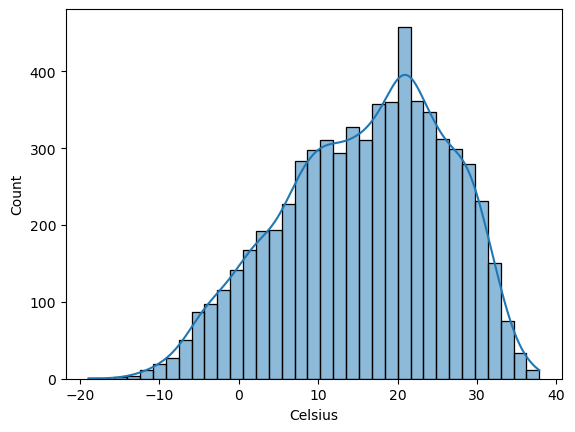

In [17]:
sns.histplot(data=data, x='Celsius',kde=True)
plt.show()

In [18]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Fuel_Price', 'CPI',
       'Unemployment', 'Celsius', 'Heat_level'],
      dtype='object')

### Box plots

#### Box plot based on columns we are selected

In [19]:
columns = ['Weekly_Sales', 'Fuel_Price', 'CPI',
       'Unemployment', 'Celsius']

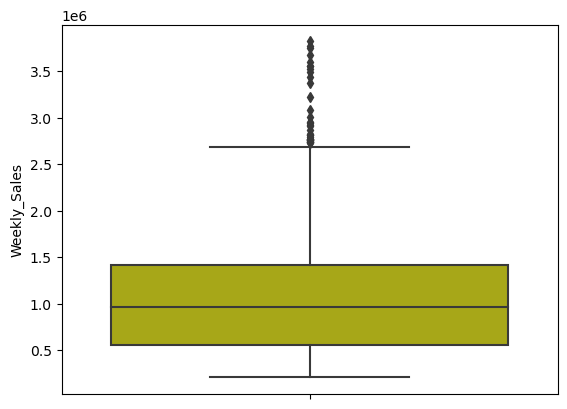

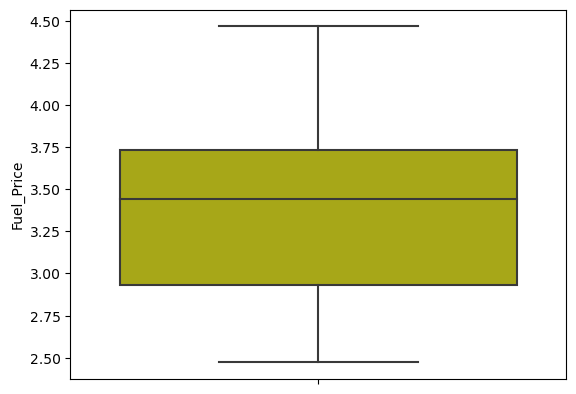

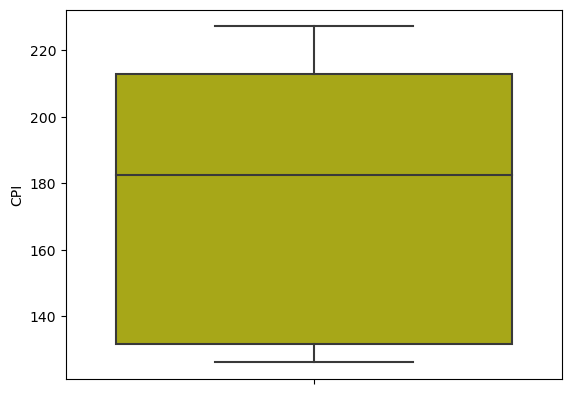

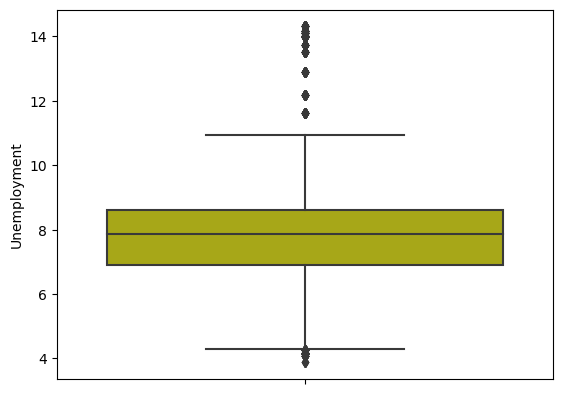

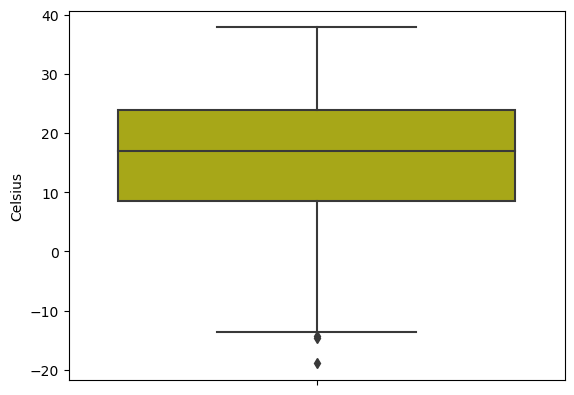

In [20]:
for i in columns:
    sns.boxplot(y = data[i] ,data=data, color = 'y')
    plt.show()

#### Assigninging colurs to individual columns

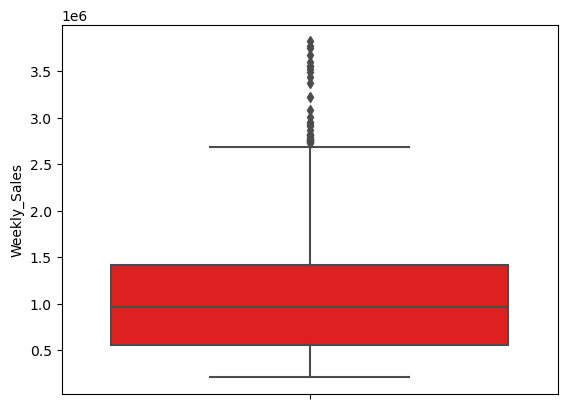

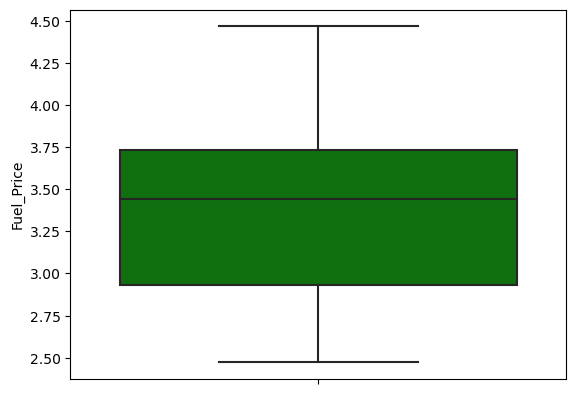

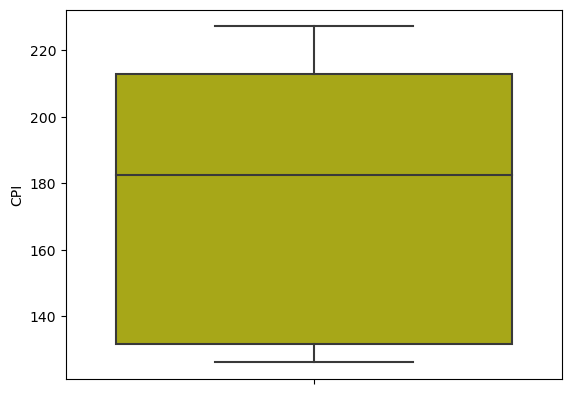

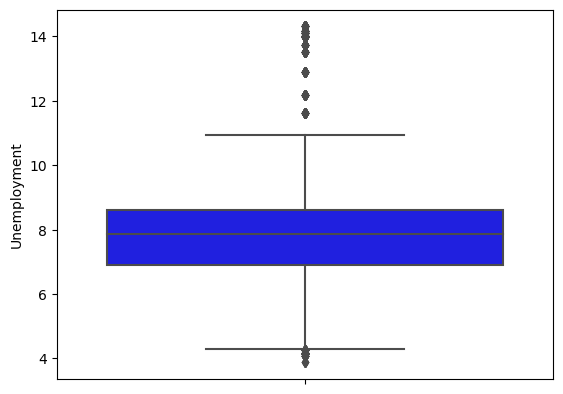

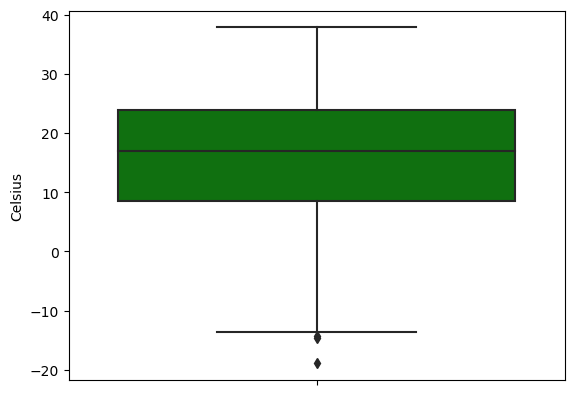

In [21]:
colors = ['r','g','y','b','g']
for i in range (len(columns)):
    for j in range(len(colors)):
        if i == j:
            sns.boxplot(y = data[columns[i]] ,data=data, color = colors[j])
    plt.show()

### Count plot

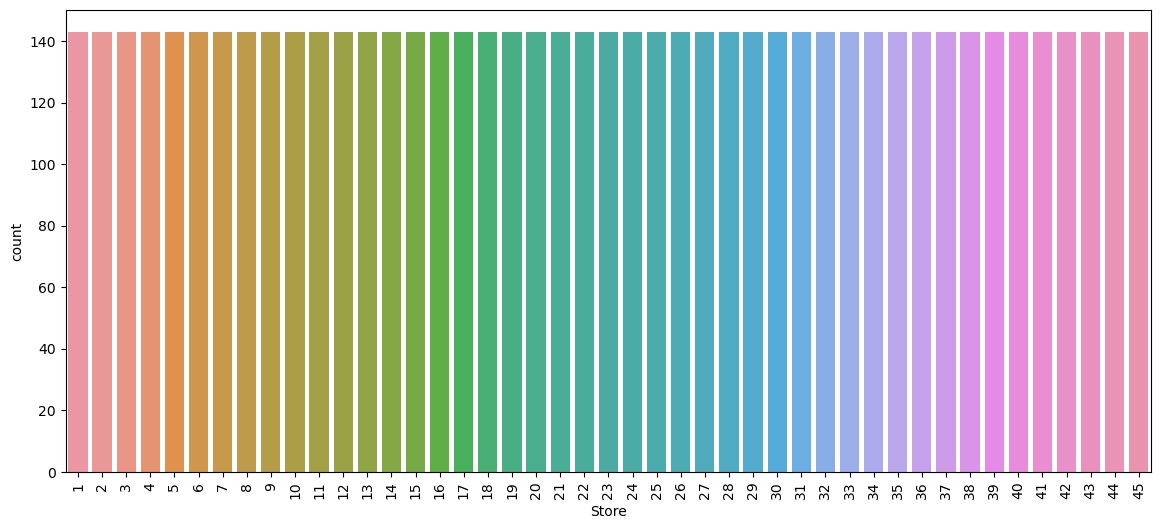

In [22]:
plt.figure(figsize=(14,6))
sns.countplot(x='Store',data=data)
plt.xticks(rotation=90)
plt.show()

##### Here from this countplot we can find a uniform graph.which means we can find equal number of reports from each Stores

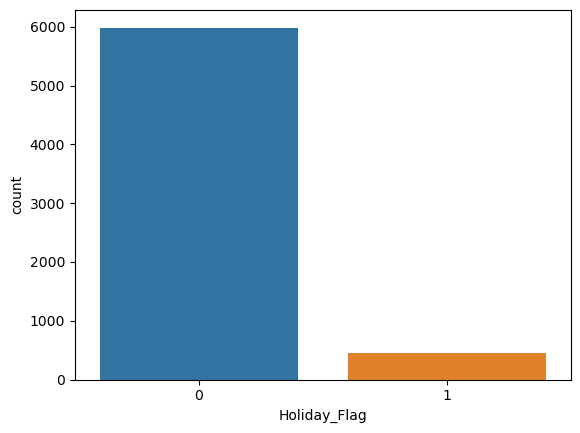

In [23]:
sns.countplot(x='Holiday_Flag',data=data)
plt.show()

In [24]:
data['Year'] = data.Date.dt.year
data['Month'] = data.Date.dt.month
data['Day'] = data.Date.dt.day
data['Week_day'] = data.Date.dt.weekday
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI,Unemployment,Celsius,Heat_level,Year,Month,Day,Week_day
0,5,2010-01-10,283178.12,0,2.603,212.226946,6.768,21.722222,Warm,2010,1,10,6
1,15,2010-01-10,566945.95,0,2.840,132.756800,8.067,15.383333,Cold,2010,1,10,6
2,42,2010-01-10,481523.93,0,3.001,126.234600,9.003,30.005556,Warm,2010,1,10,6
3,33,2010-01-10,224294.39,0,3.001,126.234600,9.265,33.027778,Warm,2010,1,10,6
4,36,2010-01-10,422169.47,0,2.567,210.440443,8.476,23.700000,Warm,2010,1,10,6


### Replacing the names of month and week

In [25]:
data['Month'] = data.Month.replace({1:'Januvary',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [26]:
data['Week_day'] = data.Week_day.replace({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesdday',4:'Thursday',5:'Friday',6:'Saturday'})

In [27]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI,Unemployment,Celsius,Heat_level,Year,Month,Day,Week_day
0,5,2010-01-10,283178.12,0,2.603,212.226946,6.768,21.722222,Warm,2010,Januvary,10,Saturday
1,15,2010-01-10,566945.95,0,2.840,132.756800,8.067,15.383333,Cold,2010,Januvary,10,Saturday
2,42,2010-01-10,481523.93,0,3.001,126.234600,9.003,30.005556,Warm,2010,Januvary,10,Saturday
3,33,2010-01-10,224294.39,0,3.001,126.234600,9.265,33.027778,Warm,2010,Januvary,10,Saturday
4,36,2010-01-10,422169.47,0,2.567,210.440443,8.476,23.700000,Warm,2010,Januvary,10,Saturday


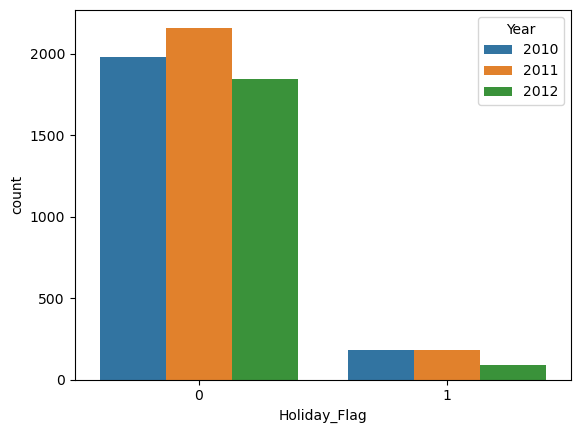

In [28]:
sns.countplot(x='Holiday_Flag',hue='Year',data=data)
plt.show()

#### From this graph we can find that this graph contains more values of the year 2023

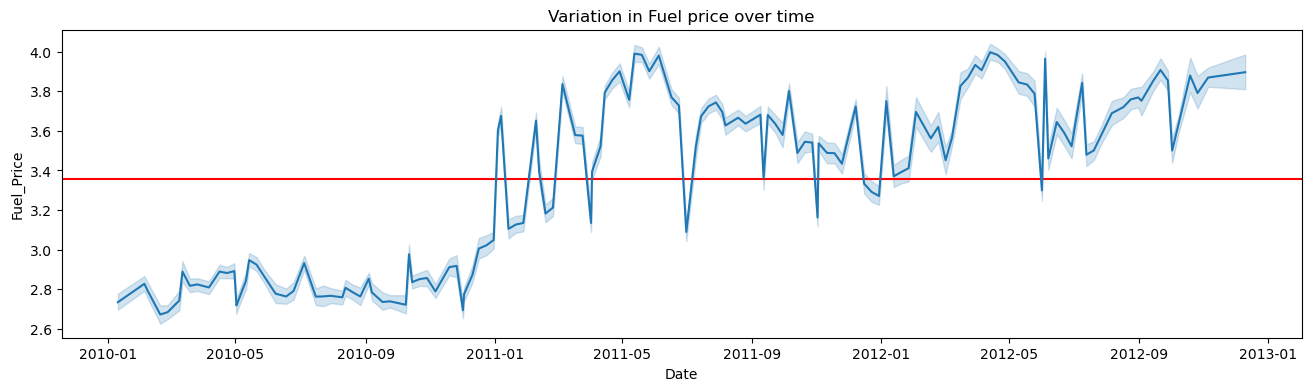

In [29]:
plt.figure(figsize=(16,4))
plt.axhline(y= data.Fuel_Price.mean(),color='r')
sns.lineplot(x='Date',y='Fuel_Price',data=data)
plt.title('Variation in Fuel price over time')
plt.show()

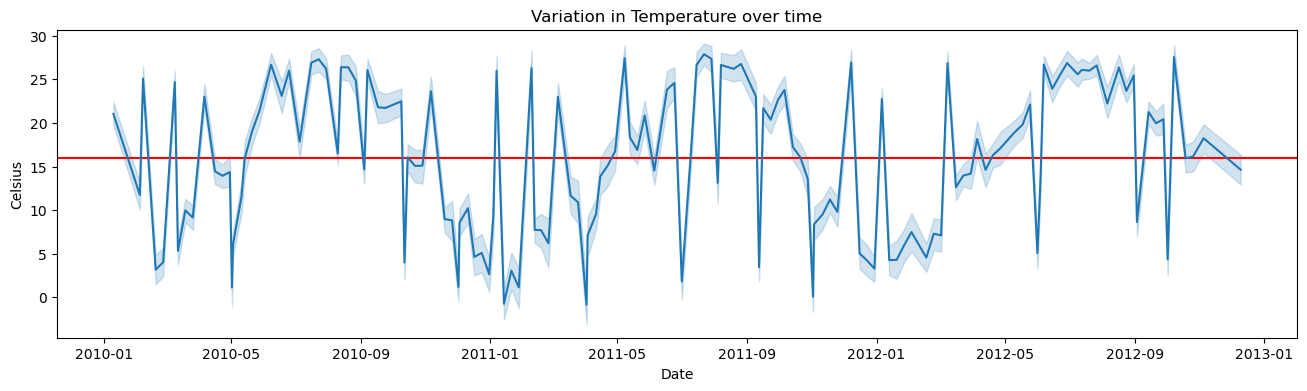

In [30]:
plt.figure(figsize=(16,4))
plt.axhline(y= data.Celsius.mean(),color='r')
sns.lineplot(x='Date',y='Celsius',data=data)
plt.title('Variation in Temperature over time')
plt.show()

### Scatter plot

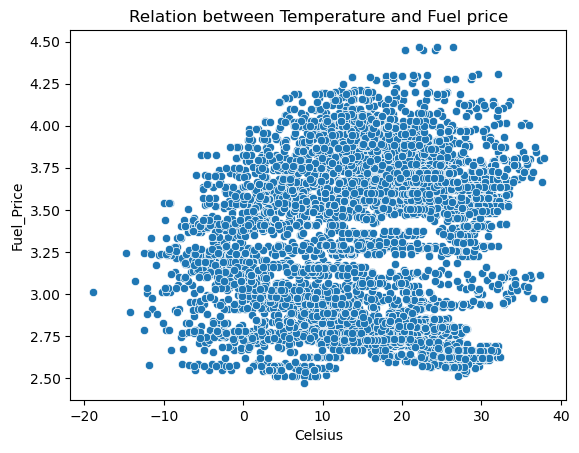

In [31]:
sns.scatterplot(x='Celsius',y='Fuel_Price',data=data)
plt.title('Relation between Temperature and Fuel price')
plt.show()

### Reg plot

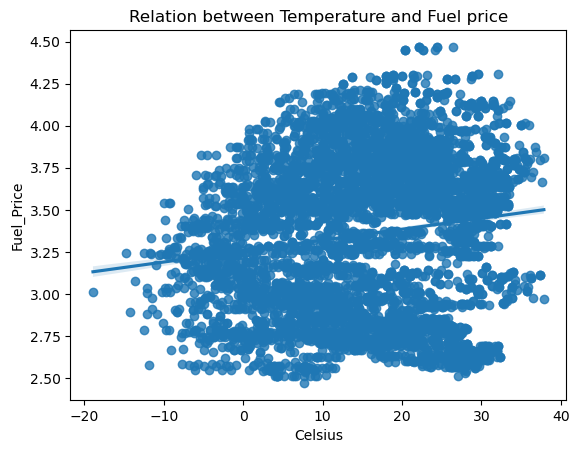

In [32]:
sns.regplot(x='Celsius',y='Fuel_Price',data=data)
plt.title('Relation between Temperature and Fuel price')
plt.show()